In [2]:
#Import pandas,numpy for Dataset Manupilation and matplotlib and seaborn for Visualization
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [3]:
#Import functions for Model, Dataset Splitting and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [4]:
df=pd.read_csv('Datasets/glass.csv') #Read the Dataset CSV File to a dataframe object

In [5]:
df.shape # To view the shape of our dataset (214 rows and 11 columns)

(214, 11)

In [6]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.info() #Information about the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Class   214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [8]:
df.describe() # Further Statistical Information about the dataset

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


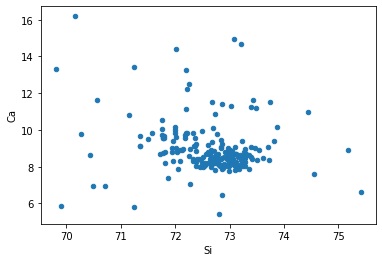

In [9]:
# Display datapoints of glass by plotting Silicon vs Calcium (Two main chemicals of glass composition)
df.plot(kind="scatter", x="Si", y="Ca") # Plot the data points (x-Sepal Length and y-Sepal Width)
plt.show()

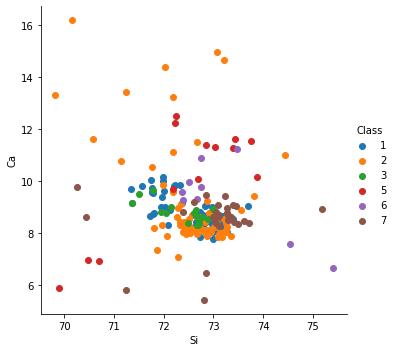

-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps


In [10]:
sns.FacetGrid(df, hue="Class", height=5).map(plt.scatter, "Si", "Ca").add_legend() 
plt.show()
print("""-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps""")

<AxesSubplot:xlabel='Class', ylabel='Fe'>

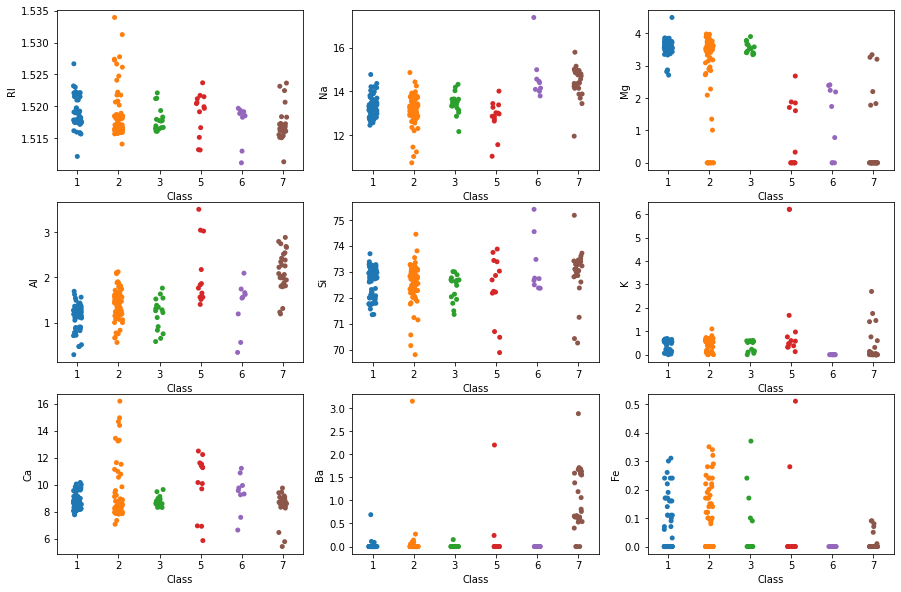

In [11]:
# Display distribution of data points of each class in each attribute
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.stripplot(x = 'Class', y = 'RI', data = df, jitter = True)
plt.subplot(3,3,2)
sns.stripplot(x = 'Class', y = 'Na', data = df, jitter = True)
plt.subplot(3,3,3)
sns.stripplot(x = 'Class', y = 'Mg', data = df, jitter = True)
plt.subplot(3,3,4)
sns.stripplot(x = 'Class', y = 'Al', data = df, jitter = True)
plt.subplot(3,3,5)
sns.stripplot(x = 'Class', y = 'Si', data = df, jitter = True)
plt.subplot(3,3,6)
sns.stripplot(x = 'Class', y = 'K', data = df, jitter = True)
plt.subplot(3,3,7)
sns.stripplot(x = 'Class', y = 'Ca', data = df, jitter = True)
plt.subplot(3,3,8)
sns.stripplot(x = 'Class', y = 'Ba', data = df, jitter = True)
plt.subplot(3,3,9)
sns.stripplot(x = 'Class', y = 'Fe', data = df, jitter = True)

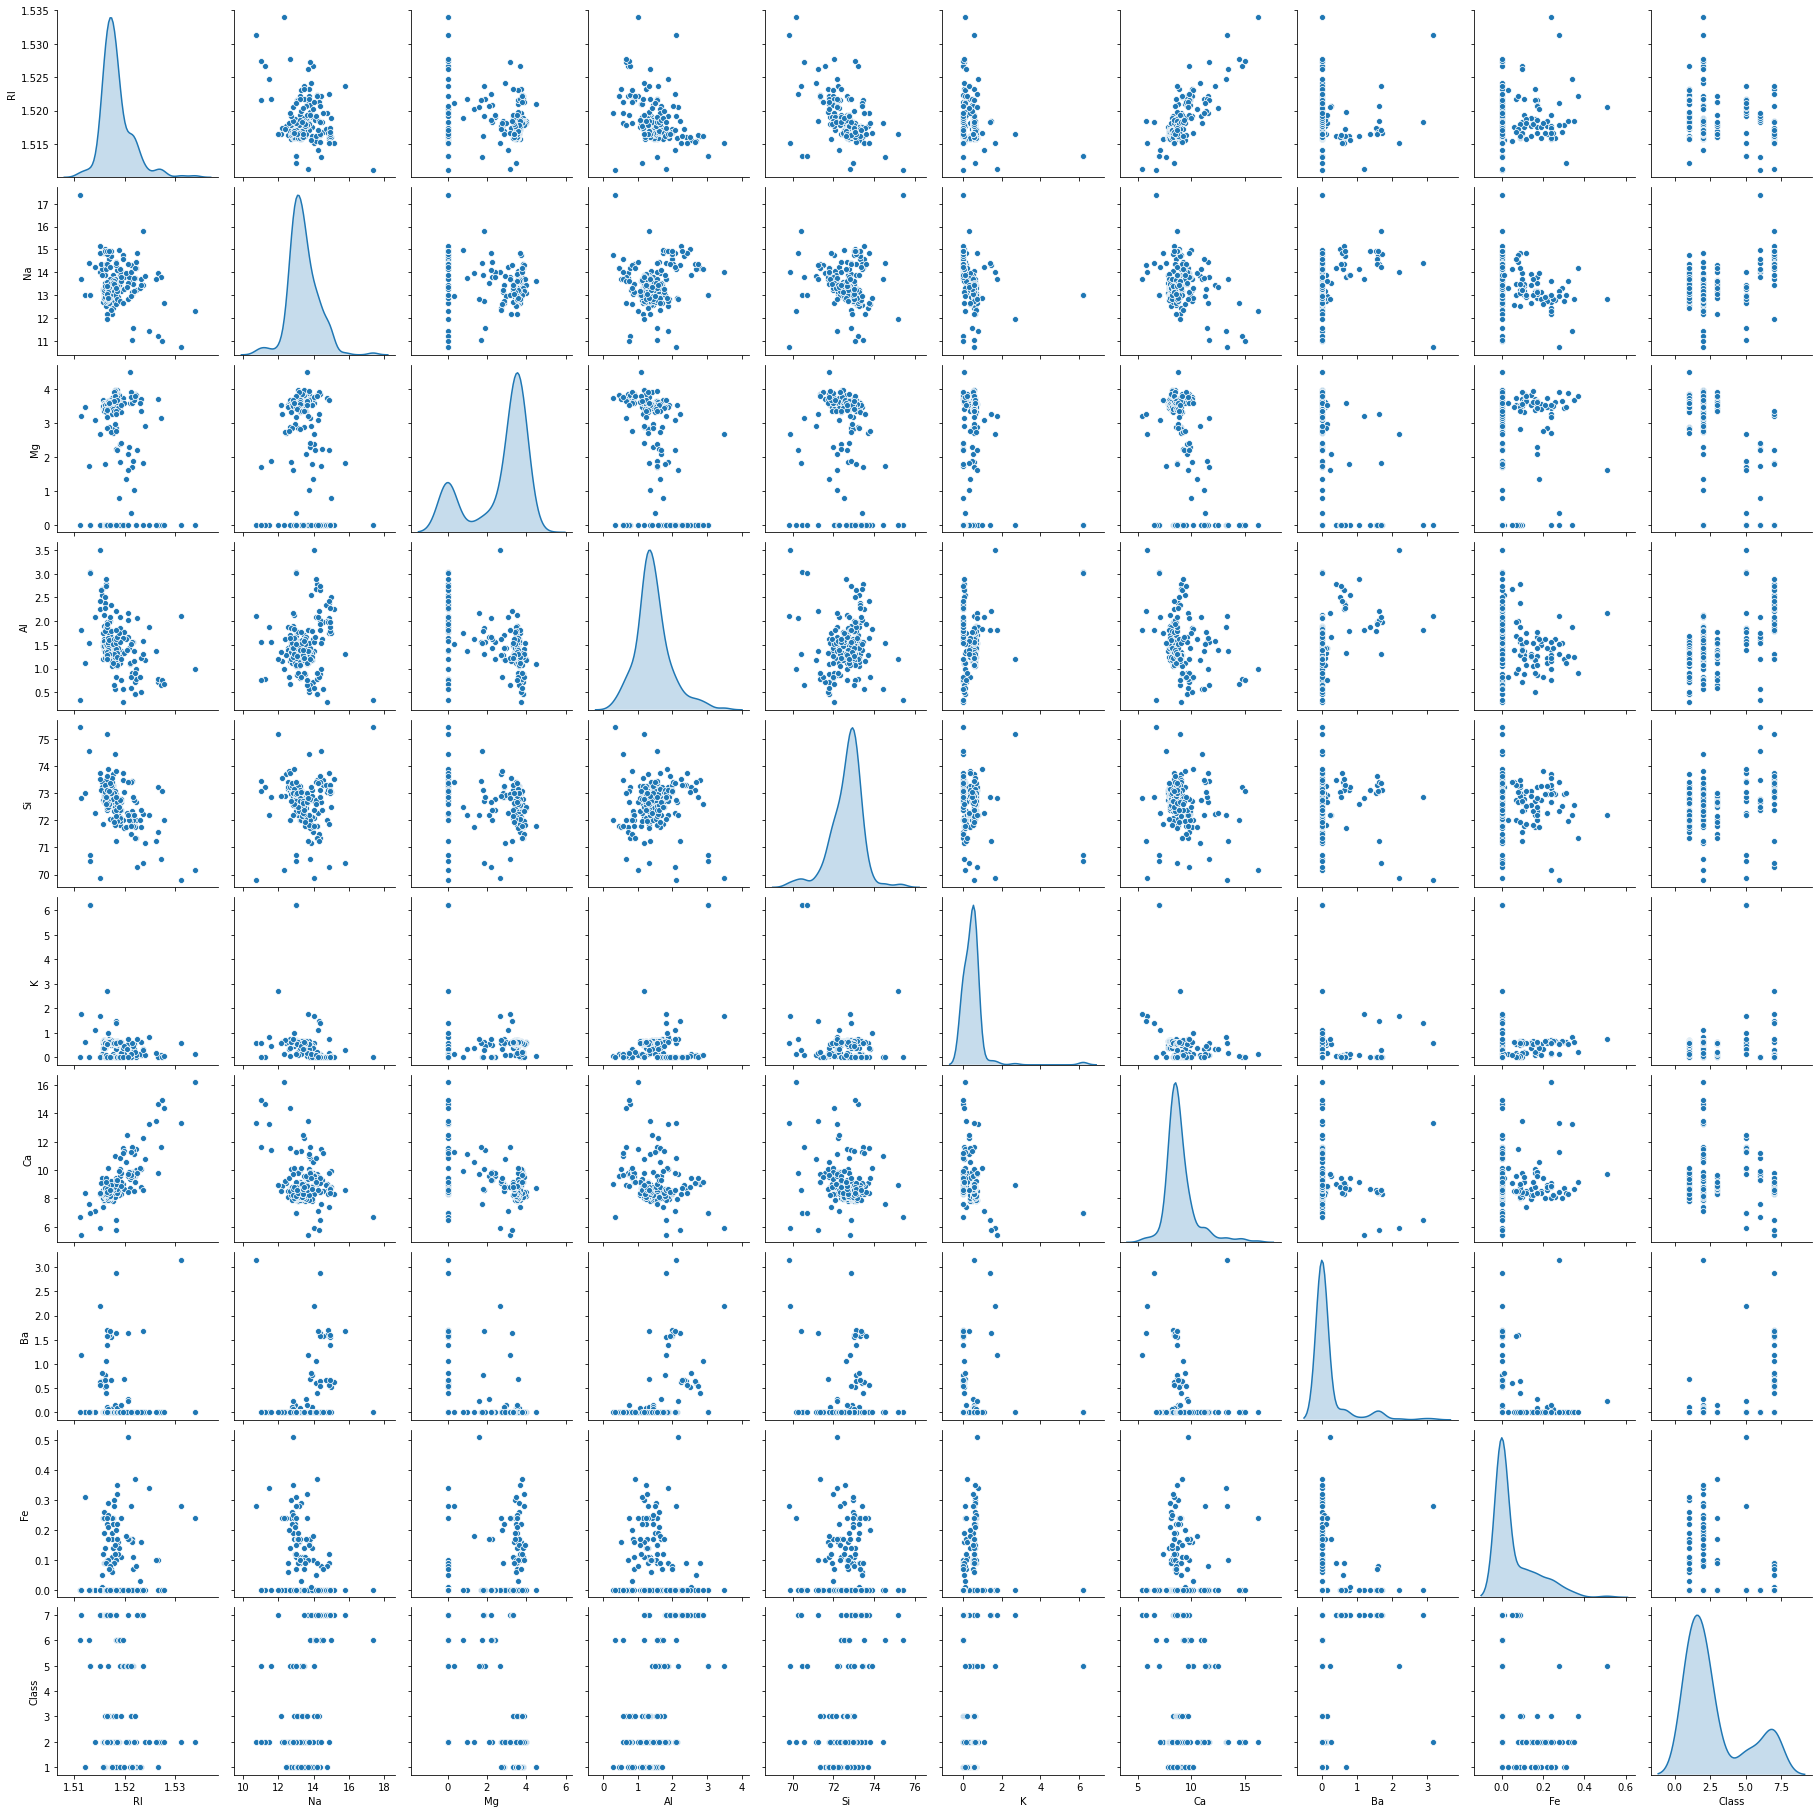

In [12]:
dfmod=df.drop(['Id'],axis=1)
sns.pairplot(data=dfmod,kind='scatter',diag_kind='kde') #Shows relationships among all pairs of features

In [13]:
corr=dfmod.corr() #Correlation Matrix

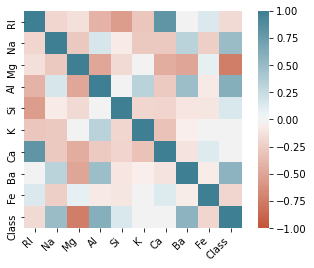

In [14]:
# Display the correlation matrix using a heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [15]:
# Exactly –1. A perfect downhill (negative) linear relationship

# –0.70. A strong downhill (negative) linear relationship

# –0.50. A moderate downhill (negative) relationship

# –0.25. A weak downhill (negative) linear relationship

# 0. No linear relationship


# +0.25. A weak uphill (positive) linear relationship

# +0.50. A moderate uphill (positive) relationship

# +0.70. A strong uphill (positive) linear relationship

# Exactly +1. A perfect uphill (positive) linear relationship

In [16]:
X=df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].values
y=df['Class'].values

In [20]:
clf=SVC(kernel='linear')

In [22]:
# Create the training and test sets using 0.2 as test size (i.e 80% of data for training rest 20% for model testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [23]:
#Create the SVC Object and fit the training set to the model object
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [25]:
y_pred = clf.predict(X_test)

In [28]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5555555555555556


In [29]:
# Get the confusion Matrix of the Model
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12,  2,  0,  0,  0,  0],
       [13,  9,  0,  1,  1,  0],
       [ 3,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

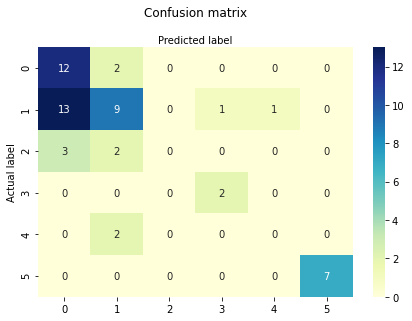

In [45]:
# Plot the Confusion Matrix as a HeatMap
class_names=[0,1,2,3,4,5] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print(metrics.classification_report(y, clf.predict(X))) # Displays a comprehensive Report of the SVC Model

              precision    recall  f1-score   support

           1       0.57      0.83      0.67        70
           2       0.63      0.55      0.59        76
           3       0.00      0.00      0.00        17
           5       0.82      0.69      0.75        13
           6       0.62      0.56      0.59         9
           7       1.00      0.90      0.95        29

    accuracy                           0.65       214
   macro avg       0.61      0.59      0.59       214
weighted avg       0.62      0.65      0.63       214



d:\projects\devenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
